### Loading and cleaning Congressional Map

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

Loading the Congressional District Shape File from url:

https://catalog.data.gov/dataset/tiger-line-shapefile-2018-nation-u-s-116th-congressional-district-national

444


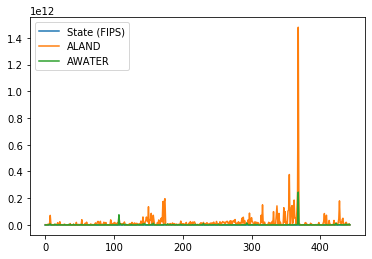

In [49]:
shape = gpd.read_file('C:\\Users\\Ray\\Downloads\\tl_2019_us_cd116\\tl_2019_us_cd116.shp')
shape.rename(columns={'STATEFP': 'State (FIPS)'}, inplace=True)
shape['State (FIPS)'] = shape['State (FIPS)'].astype(int)
merged = pd.merge(fips_state, shape, on='State (FIPS)', how='right')

In [9]:
congress = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2018/CD/tl_2018_us_cd116.zip")
congress.rename(columns={'STATEFP': 'State (FIPS)', 'NAMELSAD': 'District Number' },inplace=True)
congress['State (FIPS)'] = congress['State (FIPS)'].astype(int)

Loading FIPS State indexer to get state names

In [3]:
fips_state = pd.read_excel(
                    "https://www2.census.gov/programs-surveys/popest/geographies/2016/state-geocodes-v2016.xls", 
                           header=5, usecols=['State (FIPS)', 'Name'])

fips_state = fips_state[fips_state['State (FIPS)'] != 0]
fips_state.rename(columns={'Name': 'State Name'},inplace=True)

Merging the FIPS and congressional Map and further cleaning
Line 2: dropping Guam, US Virgin Islands, Puerto Rico, American Samoa, Northern Marina Islands, found via the FIPS code 

https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code

In [27]:
cong_map = pd.merge(fips_state, congress, on='State (FIPS)', how='right')
cong_map = cong_map[~cong_map['State Name'].isna()]
cong_map[cong_map['State Name'].isna()]

,State (FIPS),State Name,CD116FP,GEOID,District Number,LSAD,CDSESSN,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
439,69,NaN,98,6998,Delegate District (at Large),C4,116,G5200,N,472292529,4644252461,+14.9300771,+145.6425305,"MULTIPOLYGON (((146.00199 16.02878, 146.01425 ..."
440,66,NaN,98,6698,Delegate District (at Large),C4,116,G5200,N,543555840,934337453,+13.4382886,+144.7729493,"POLYGON ((144.56343 13.44806, 144.56357 13.450..."
441,78,NaN,98,7898,Delegate District (at Large),C4,116,G5200,N,348021896,1550236201,+18.2758499,-064.8903849,"MULTIPOLYGON (((-64.95671 17.67898, -64.95638 ..."
442,72,NaN,98,7298,Resident Commissioner District (at Large),C3,116,G5200,N,8868896030,4922382562,+18.2176480,-066.4107992,"MULTIPOLYGON (((-67.32325 18.36388, -67.32227 ..."
443,60,NaN,98,6098,Delegate District (at Large),C4,116,G5200,N,197759063,1307243754,-14.2671590,-170.6682674,"MULTIPOLYGON (((-168.22527 -14.53591, -168.224..."


In [35]:
cong_map.tail(10)
cong_map[cong_map['CD116FP'] == '98']
cong_map[cong_map['State Name'] == 'District of Columbia']

,State (FIPS),State Name,CD116FP,GEOID,District Number,LSAD,CDSESSN,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
176,11,District of Columbia,98,1198,Delegate District (at Large),C4,116,G5200,N,158340391,18687198,+38.9041031,-077.0172290,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."


Drop the outdated Congressional Districts in Connecticut, Illinois, and Michigan and restrict columns

In [5]:
cong_map = cong_map[cong_map['District Number'] != 'Congressional Districts not defined']
cong_map = cong_map[['State (FIPS)', 'State Name', 'District Number', 'geometry']]

#### Exporting the file for later use in Tableau

In [6]:
cong_map.to_excel('.\\congressional_map.xlsx')

In [8]:
cong_map['District Number'].unique()

array(['Congressional District 1', 'Congressional District 3',
       'Congressional District 4', 'Congressional District 5',
       'Congressional District 2', 'Congressional District 7',
       'Congressional District 9', 'Congressional District 6',
       'Congressional District 8', 'Congressional District (at Large)',
       'Congressional District 10', 'Congressional District 11',
       'Congressional District 12', 'Congressional District 27',
       'Congressional District 17', 'Congressional District 14',
       'Congressional District 24', 'Congressional District 16',
       'Congressional District 15', 'Congressional District 23',
       'Congressional District 18', 'Congressional District 20',
       'Congressional District 25', 'Congressional District 21',
       'Congressional District 13', 'Congressional District 26',
       'Congressional District 22', 'Congressional District 19',
       'Delegate District (at Large)', 'Congressional District 28',
       'Congressional D